In [1]:
#importing libraries to be used
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings

from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [2]:
df = pd.read_csv('/content/ADANIENT.NS.csv') # data_importing
df.head(10) # fetching first 10 rows of dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-05,3374.100098,3431.800049,3313.000000,3346.550049,3343.205811,3686950
1,2022-09-06,3370.000000,3447.600098,3355.000000,3435.800049,3432.366455,2580772
2,2022-09-07,3435.800049,3487.949951,3406.100098,3473.750000,3470.278564,2188110
3,2022-09-08,3499.000000,3501.500000,3450.000000,3462.800049,3459.339600,1560414
4,2022-09-09,3479.000000,3507.949951,3415.149902,3451.199951,3447.751221,1614634
5,2022-09-12,3465.000000,3495.500000,3457.899902,3463.800049,3460.338623,1647756
6,2022-09-13,3478.000000,3568.899902,3421.300049,3555.800049,3552.246582,3479669
7,2022-09-14,3518.000000,3608.000000,3511.000000,3572.100098,3568.530518,2740337
8,2022-09-15,3590.000000,3767.949951,3575.000000,3748.699951,3744.953613,4716688
9,2022-09-16,3755.000000,3866.949951,3614.600098,3702.199951,3698.500244,5687429


In [3]:
# shape of data
print("Shape of data:",df.shape)

Shape of data: (249, 7)


In [4]:
# statistical description of data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,249.000000,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,2772.205017,2822.699187,2703.427716,2760.094981,2757.748979,5.450796e+06
std,826.752842,821.624501,831.583658,826.763120,825.795662,6.258598e+06
min,1145.000000,1313.800049,1017.450012,1193.500000,1192.307373,0.000000e+00
25%,1935.000000,1990.000000,1881.000000,1924.949951,1923.026245,1.863848e+06
50%,2499.199951,2549.000000,2455.649902,2492.199951,2490.858398,3.294056e+06
75%,3583.500000,3629.550049,3526.000000,3580.699951,3577.121582,6.127920e+06
max,4175.000000,4190.000000,4066.399902,4165.299805,4161.137207,4.388558e+07


In [5]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       249 non-null    object 
 1   Open       249 non-null    float64
 2   High       249 non-null    float64
 3   Low        249 non-null    float64
 4   Close      249 non-null    float64
 5   Adj Close  249 non-null    float64
 6   Volume     249 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


In [6]:
# checking null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df = df[['Date','Open','Close']] # Extracting required columns
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0])) # converting object dtype of date column to datetime dtype
df.set_index('Date',drop=True,inplace=True) # Setting date column as index
df.head(10)

,Open,Close
Date,,
2022-09-05,3374.100098,3346.550049
2022-09-06,3370.000000,3435.800049
2022-09-07,3435.800049,3473.750000
2022-09-08,3499.000000,3462.800049
2022-09-09,3479.000000,3451.199951
2022-09-12,3465.000000,3463.800049
2022-09-13,3478.000000,3555.800049
2022-09-14,3518.000000,3572.100098
2022-09-15,3590.000000,3748.699951


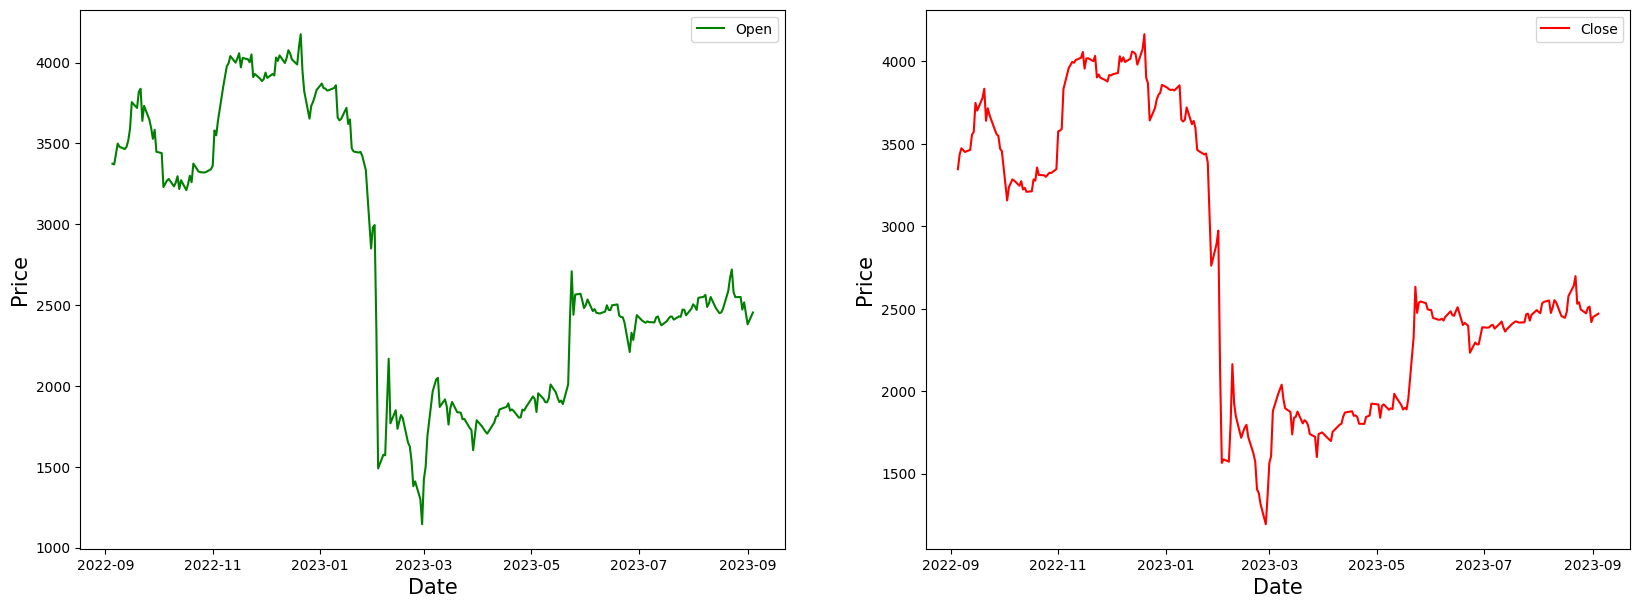

In [8]:
# plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

In [9]:
# normalizing all the values of all columns using MinMaxScaler
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,Open,Close
Date,,
2022-09-05,0.735677,0.724494
2022-09-06,0.734323,0.754526
2022-09-07,0.756040,0.767296
2022-09-08,0.776898,0.763611
2022-09-09,0.770297,0.759708
2022-09-12,0.765677,0.763948
2022-09-13,0.769967,0.794906
2022-09-14,0.783168,0.800390
2022-09-15,0.806931,0.859816


In [10]:
# splitting the data into training and test set
training_size = round(len(df) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

187

In [11]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((187, 2), (62, 2))

In [12]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [13]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((137, 50, 2), (137, 2), (12, 50, 2), (12, 2))

In [14]:
# imported Sequential from keras.models
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [15]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
5/5 [==============================] - 6s 289ms/step - loss: 0.2721 - mean_absolute_error: 0.4210 - val_loss: 0.0552 - val_mean_absolute_error: 0.2323
Epoch 2/100
5/5 [==============================] - 0s 51ms/step - loss: 0.0651 - mean_absolute_error: 0.1956 - val_loss: 0.0197 - val_mean_absolute_error: 0.1364
Epoch 3/100
5/5 [==============================] - 0s 55ms/step - loss: 0.0478 - mean_absolute_error: 0.1628 - val_loss: 0.0053 - val_mean_absolute_error: 0.0606
Epoch 4/100
5/5 [==============================] - 0s 51ms/step - loss: 0.0219 - mean_absolute_error: 0.1079 - val_loss: 0.0037 - val_mean_absolute_error: 0.0525
Epoch 5/100
5/5 [==============================] - 0s 55ms/step - loss: 0.0232 - mean_absolute_error: 0.1173 - val_loss: 0.0031 - val_mean_absolute_error: 0.0449
Epoch 6/100
5/5 [==============================] - 0s 56ms/step - loss: 0.0196 - mean_absolute_error: 0.1013 - val_loss: 0.0011 - val_mean_absolute_error: 0.0263
Epoch 7/100
5/5 [==========

In [16]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

1/1 [==============================] - 1s 783ms/step


array([[0.4223384 , 0.4146536 ],
       [0.4222304 , 0.4144884 ],
       [0.4276832 , 0.4198713 ],
       [0.43819812, 0.43032008],
       [0.4453756 , 0.43752107]], dtype=float32)

In [17]:
# Inversing normalization/scaling on predicted data
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[2424.6853, 2425.7673],
       [2424.3582, 2425.2766],
       [2440.8801, 2441.2734],
       [2472.7405, 2472.3252],
       [2494.488 , 2493.725 ]], dtype=float32)

In [18]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-12:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-12:].index)], axis=1)

In [19]:
# Inversing normalization/scaling
df_merge[['Open','Close']] = MMS.inverse_transform(df_merge[['Open','Close']])
df_merge.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2023-08-18,2477.500000,2577.399902,2424.685303,2425.767334
2023-08-21,2588.000000,2639.750000,2424.358154,2425.276611
2023-08-22,2668.850098,2698.050049,2440.880127,2441.273438
2023-08-23,2720.000000,2530.300049,2472.740479,2472.325195
2023-08-24,2580.000000,2539.550049,2494.488037,2493.725098


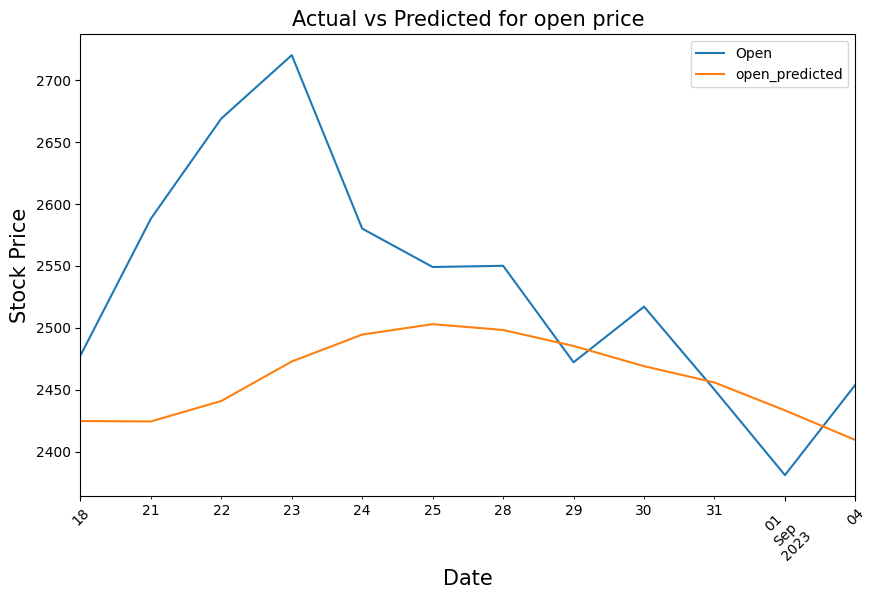

In [20]:
# plotting the actual open and predicted open prices on date index
df_merge[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

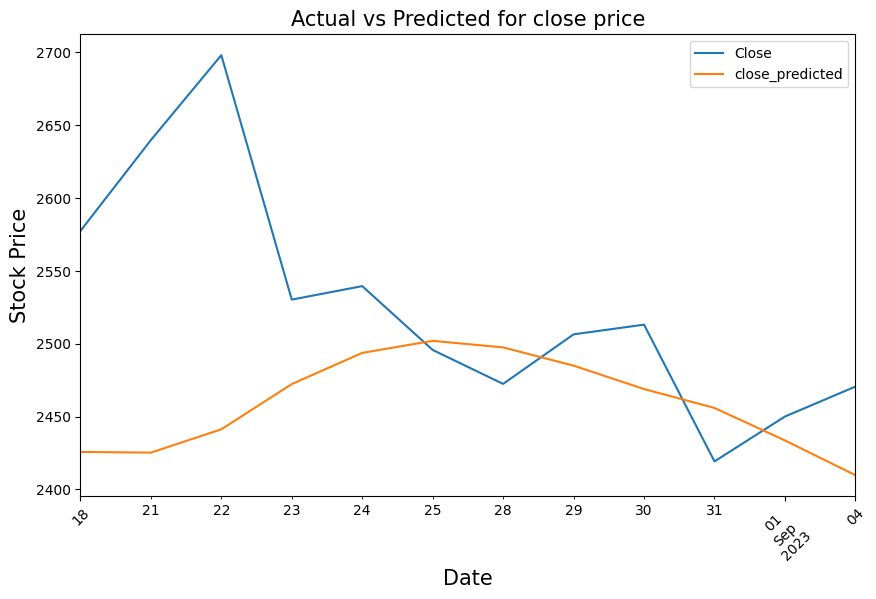

In [21]:
# plotting the actual close and predicted close prices on date index
df_merge[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [22]:
# Creating a dataframe and adding 10 days to existing index

df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2023-09-05':'2023-09-20']

,Open,Close,open_predicted,close_predicted
2023-09-05,NaN,NaN,NaN,NaN
2023-09-06,NaN,NaN,NaN,NaN
2023-09-07,NaN,NaN,NaN,NaN
2023-09-08,NaN,NaN,NaN,NaN
2023-09-09,NaN,NaN,NaN,NaN
2023-09-10,NaN,NaN,NaN,NaN
2023-09-11,NaN,NaN,NaN,NaN
2023-09-12,NaN,NaN,NaN,NaN
2023-09-13,NaN,NaN,NaN,NaN
2023-09-14,NaN,NaN,NaN,NaN


In [23]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['Open','Close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [24]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 37ms/step


In [25]:
# inversing Normalization/scaling
upcoming_prediction[['Open','Close']] = MMS.inverse_transform(upcoming_prediction[['Open','Close']])

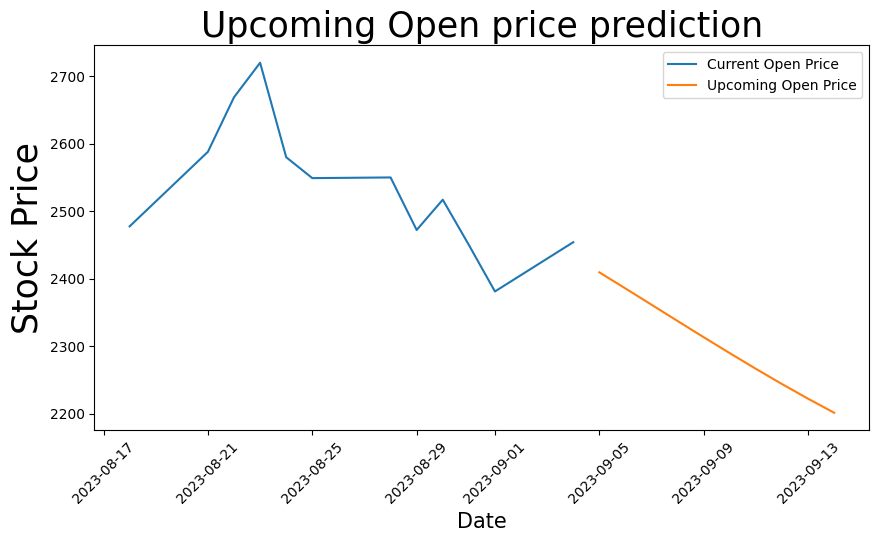

In [26]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2023-08-07':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2023-08-07':,'Open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=25)
ax.set_title('Upcoming Open price prediction',size=25)
ax.legend()
fig.show()

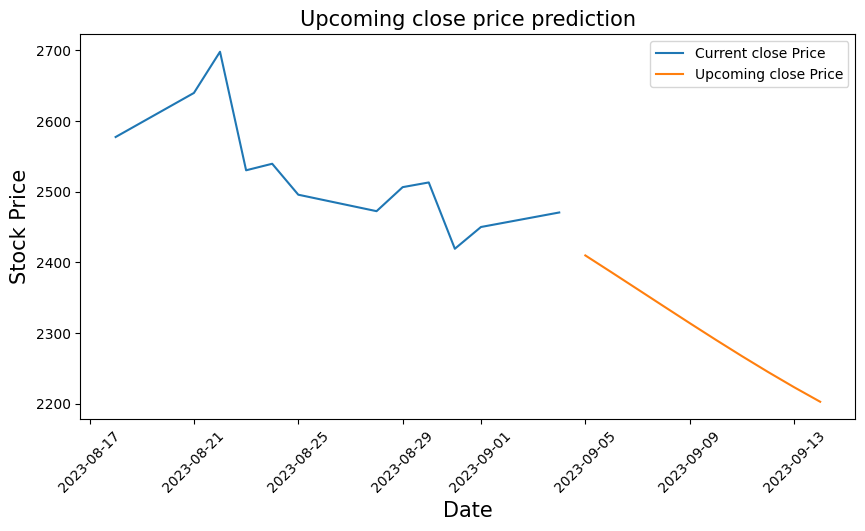

In [27]:
# plotting Upcoming Close price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2023-08-07':,'Close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2023-08-07':,'Close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()